In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
# This line is set so that autocomplete works in Jupyter
%config Completer.use_jedi = False

In [3]:
all_trails_info = pd.read_csv('national_park_trails.csv')

In [4]:
all_trails_info.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [5]:
print(all_trails_info.dtypes)

trail_id               int64
name                  object
area_name             object
city_name             object
state_name            object
country_name          object
_geoloc               object
popularity           float64
length               float64
elevation_gain       float64
difficulty_rating      int64
route_type            object
visitor_usage        float64
avg_rating           float64
num_reviews            int64
features              object
activities            object
units                 object
dtype: object


In [6]:
all_trails_info.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [7]:
corr_matrix = all_trails_info.corr()

<AxesSubplot:>

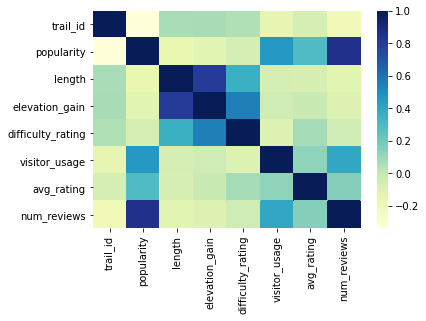

In [8]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [9]:
all_trails_info.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [10]:
all_trails_info.shape

(3313, 18)

In [11]:
# Since we saw that 'visitor_usage' had 253 NA values, we pulled these out to their own dataframe.
no_visitors = all_trails_info[all_trails_info['visitor_usage'].isna()]

In [12]:
no_visitors.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
18,10023165,Quigley Ridge Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.52444, 'lng': -150.96015}",3.3040,14644.994,730.9104,3,out and back,NaN,4.5,5,"['dogs-no', 'views']","['hiking', 'trail-running', 'canoeing']",i
63,10026822,Cape Final,Grand Canyon National Park,North Rim,Arizona,United States,"{'lat': 36.14579, 'lng': -111.9355}",12.0834,6437.360,150.8760,1,out and back,NaN,4.5,76,"['dogs-no', 'forest', 'kids', 'views']","['camping', 'hiking']",i
66,10004435,Hugh Norris Trail,Saguaro National Park,Tucson,Arizona,United States,"{'lat': 32.27146, 'lng': -111.20301}",11.8001,14323.126,729.9960,3,out and back,NaN,4.5,103,"['dogs-no', 'views']","['hiking', 'nature-trips', 'horseback-riding']",i
69,10258648,Hermit's Rest Viewpoint to Santa Maria Spring,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 36.06065, 'lng': -112.21219}",11.1051,5471.756,528.8280,3,out and back,NaN,4.5,39,"['dogs-no', 'views', 'wild-flowers', 'wildlife']","['birding', 'hiking', 'trail-running']",i
96,10032774,Garwood Trail,Saguaro National Park,Tucson,Arizona,United States,"{'lat': 32.23517, 'lng': -110.68678}",8.2525,5310.822,61.8744,1,out and back,NaN,4.5,39,"['dogs-no', 'kids']","['hiking', 'walking']",i


In [13]:
all_trails_info[all_trails_info['name'] == 'Upper Yosemite Falls Trail']

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
220,10005895,Upper Yosemite Falls Trail,Yosemite National Park,Yosemite Valley,California,United States,"{'lat': 37.74237, 'lng': -119.60223}",53.628,11587.248,967.74,7,out and back,3.0,5.0,1351,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'hiking', 'nature-trips', 'trail-r...",i


In [14]:
fours = all_trails_info[all_trails_info['visitor_usage']==4]
fours.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
82,10002324,Desert View Visitor Center Trail,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 36.04123, 'lng': -111.82692}",9.7326,643.736,10.9728,1,loop,4.0,4.0,41,"['ada', 'dogs-leash', 'kids', 'partially-paved...","['hiking', 'walking']",i
226,10031426,Sentinel Dome Trail,Yosemite National Park,Yosemite Valley,California,United States,"{'lat': 37.71243, 'lng': -119.58632}",37.5768,3379.614,138.9888,1,out and back,4.0,5.0,577,"['forest', 'views', 'wild-flowers', 'wildlife']","['hiking', 'trail-running']",i
227,10033113,Glacier Point Trail,Yosemite National Park,Yosemite Valley,California,United States,"{'lat': 37.72765, 'lng': -119.57432}",37.4664,965.604,71.9328,1,out and back,4.0,4.5,344,"['ada', 'dogs-leash', 'forest', 'kids', 'paved...","['birding', 'hiking', 'nature-trips', 'snowsho...",i
230,10235913,Mirror Lake via Valley Loop Trail,Yosemite National Park,Yosemite Valley,California,United States,"{'lat': 37.73889, 'lng': -119.56914}",34.1675,9012.304,101.8032,1,loop,4.0,4.0,622,"['ada', 'dogs-no', 'forest', 'lake', 'kids', '...","['hiking', 'walking']",i
236,10235992,General Sherman Tree Trail,Sequoia National Park,Three Rivers,California,United States,"{'lat': 36.58498, 'lng': -118.74978}",29.8260,1287.472,46.9392,1,out and back,4.0,4.5,442,"['ada', 'dogs-no', 'forest', 'kids', 'paved', ...","['birding', 'hiking', 'nature-trips', 'walking']",i


In [15]:
print(list(all_trails_info))

['trail_id', 'name', 'area_name', 'city_name', 'state_name', 'country_name', '_geoloc', 'popularity', 'length', 'elevation_gain', 'difficulty_rating', 'route_type', 'visitor_usage', 'avg_rating', 'num_reviews', 'features', 'activities', 'units']


In [16]:
all_activities=all_trails_info['activities']
unique_activities=[]
for index,row in all_trails_info.iterrows():
    res=row['activities'].strip('[]').strip("''").split(', ')
    for item in res:
        if res not in unique_activities:
            unique_activities.append(res)


In [17]:
all_trails_info = all_trails_info.dropna()

In [18]:
all_trails_info.isnull().sum()

trail_id             0
name                 0
area_name            0
city_name            0
state_name           0
country_name         0
_geoloc              0
popularity           0
length               0
elevation_gain       0
difficulty_rating    0
route_type           0
visitor_usage        0
avg_rating           0
num_reviews          0
features             0
activities           0
units                0
dtype: int64

In [19]:
all_trails_info.rename(columns = {'_geoloc':'coordinates'}, inplace = True)

In [20]:
all_trails_info.head()

,trail_id,name,area_name,city_name,state_name,country_name,coordinates,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


<AxesSubplot:xlabel='difficulty_rating', ylabel='count'>

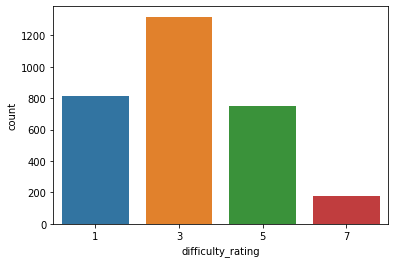

In [21]:
# Plot the number of trails by difficulty rating.
sns.countplot(x = all_trails_info['difficulty_rating'], data = all_trails_info)

<AxesSubplot:xlabel='route_type', ylabel='count'>

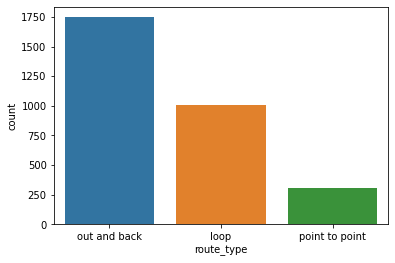

In [22]:
# Plot the count of route types
sns.countplot(data = all_trails_info, x = all_trails_info.route_type)

In [23]:
import ast

#split off features and activities into lists of unique values
unique_features=[]
unique_activities=[]

for index, row in all_trails_info.iterrows():
    features=ast.literal_eval(row['features'])
    activities=ast.literal_eval(row['activities'])
    for feature in features:
        if feature not in unique_features:
            unique_features.append(feature)
    for activity in activities:
        if activity not in unique_activities:
            unique_activities.append(activity)

In [29]:
# Create new columns for each feature in the unique_features list (initailized to 0, but it doesn't matter)
for item in unique_features:
    all_trails_info[item] = 0

# Loop through each row in the dataframe
for index, row in all_trails_info.iterrows():
    # Grab a list of the features for the current row
    features=ast.literal_eval(row['features'])
    
    # Loop through each item in the unique_features list
    for item in unique_features:
        # If the item is in the features list that we created for the row
        if item in features:
            # Change the value of the appropriate column to a 1
            all_trails_info.loc[index, item] = 1
        else:
            # Otherwise it is not present, and we leave it as a 0
            all_trails_info.loc[index, item] = 0

In [34]:
# Create new columns for each activities in the unique_activities list (initailized to 0, but it doesn't matter)
for item in unique_activities:
    all_trails_info[item] = 0

# Loop through each row in the dataframe
for index, row in all_trails_info.iterrows():
    # Grab a list of the activities for the current row
    activities=ast.literal_eval(row['activities'])
    # Loop through each item in the unique_activities list
    for item in unique_activities:
        # If the item is in the activities list that we created for the row
        if item in activities:
            # Change the value of the appropriate column to a 1
            all_trails_info.loc[index, item] = 1
        else:
            # Otherwise it is not present, and we leave it as a 0
            all_trails_info.loc[index, item] = 0

In [37]:
all_trails_info.iloc[:,39:]

,birding,camping,hiking,nature-trips,trail-running,walking,fishing,backpacking,sea-kayaking,mountain-biking,...,cross-country-skiing,fly-fishing,paddle-sports,skiing,bike-touring,whitewater-kayaking,canoeing,ice-climbing,surfing,snowboarding
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3308,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3309,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3311,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
